In [3]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.interpolate import CubicSpline

In [2]:
rcParams['figure.figsize'] = [10, 5]

## 1.-
En un laboratorio, se construyo un aparato capaz de medir la densidad de probabilidad al encontrar las particulas de un gas a temperatura $T$, si estas tienen una velocidad definida.

#### a)
Los laboratoristas quieren conocer la forma de la relacion entre las diferentes velocidades y la densidad de probabilidad medida. Para ello grafica con puntos la velocidad vs la densidad de probabilidad.  

Una vez hecho esto, emplea una tecnica de interpolacion para unir los puntos. En una sola imagen muestra la grafica de los puntos y la grafica de la interpolacion.

Repite el procedimiento para las 3 temperaturas

#### b)  
De forma teorica, la relacion entre las velocidades de las particulas de un gas y la probabilidad de ser encontradas es establecida por la distribucion de velocidades de Maxwell.

$$ P(v) =  \left ( {\frac{m}{2\pi k_{b} T}}  \right )^{\frac{3}{2}} 4\pi v^{2} exp\left (  \frac{- m v^{2}}{2k_{b} T} \right ). $$

Realiza una funcion que devuelva la distribucion de velocidades de Maxwell para cualquier $v$.

Con las tres temperaturas con las que se hicieron las mediciones, crea un array que contenga el primer y el ultimo dato de las velocidades y que tenga tantos puntos como tu interpolacion. Ahora evalua ese array en la funcion  de distribucion. En una grafica, compara los resultados experimentales con los resultados esperados de la teoria.

Considera la masa $m = 80x10^{-27}kg$, y la constante de Boltzmann $k_{B} = 1.38x10^{-23} J/K$

#### c) 
Discute con tus propias palabras el significado fisico del sistema, recuerda que tienes 3 conjuntos de datos con los cuales dar informacion del sistema y hacer una conclusion del experimento y de la relacion de Maxwell.
Si te es util, presenta en este punto una grafica con lo que consideres lo mas importante.

In [76]:
### Para una Temperatura de 100K
V1 = [0.0, 48.485, 177.778, 193.939, 210.101, 226.263, 290.909, 
      404.04, 428.283, 444.444, 541.414, 557.576, 573.737, 751.515, 775.758]

P1 = [0.0, 0.0007733503646397478, 0.004453081316080372, 0.00445259534521969,
      0.004324509702033676, 0.0040881764549094675, 0.0025641987272556595, 
      0.0005065145071193227, 0.0003171055726533776, 0.00022689467013519996, 
      2.107813848545329e-05, 1.3359656556506308e-05,
      8.326303332849198e-06, 1.54562827550723e-08, 5.631244980847614e-09]

### Para una temperatura de 300K
V2 = [20.202, 484.848, 545.455, 575.758, 727.273, 868.687, 888.889, 909.091]

P2 = [2.755190426075393e-05, 0.0016439168219188408, 0.0011380742168558336, 
      0.00091320056558513, 0.00021629868905838275, 3.4863163382166406e-05, 
      2.5902799832542358e-05, 1.907448570050496e-05]

### Para una temperatura de 1000K
V3 = [20.202, 60.606, 121.212, 141.414, 181.818, 242.424, 404.04, 484.848, 
      505.051, 585.859, 646.465, 666.667, 707.071, 828.283, 848.485, 909.091, 
      949.495, 969.697, 1030.303, 1050.505, 1070.707, 1111.111, 1131.313, 
      1151.515, 1292.929, 1313.131, 1353.535, 1393.939, 1474.747, 1494.949, 
      1575.758, 1616.162, 1656.566, 1777.778]

P3 = [4.5397533833786035e-06, 4.047293897496901e-05, 0.00015680264643668938, 
      0.00021016876469558574, 0.0003345160789292749, 0.0005519859180233924,
      0.0011326731197819414, 0.0013244832336780433, 0.0013562197859243138, 
      0.0014134332128201105, 0.0013859972134142625, 0.0013648857539570471, 0.0013071758923963869, 
      0.0010459093493258044, 0.0009949090229937202, 0.0008387260754724026, 0.0007359701225931346, 
      0.0006860256558869906, 0.0005450212518577154, 0.000501606503320778, 0.000460218518281156, 
      0.0003838547925535339, 0.00034897233596267133, 0.00031630824248069005, 0.0001464102581430714,
      0.00012964747603839462, 0.00010079895431324649, 7.74932085415621e-05, 4.429953595863493e-05, 
      3.825560965144192e-05, 2.0704213979511112e-05, 1.4986609830973766e-05, 1.0732353973463328e-05, 
      3.6983160964226497e-06]

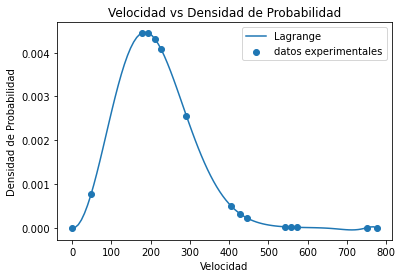

In [77]:
#a)
#Lagrange generalizado
def inter_lagrange(x,X,Y):
    if len(X)!= len(Y):
        return ('Vectores con dimensiones distintas')
    else:
        Puntos=list(zip(X,Y)) #aquí genero los puntos, con las listas dadas por el usuario
        Lk=[] # Lista para los polinomios de Lagrange
        n=len(X) #Podemos escoger X pues ya aseguramos que X y Y tengan el mismo número de elementos
        for i in range(n): #indice lento
            l=1
            for k in range(n): #indice rapido
                if k!=i:  #Porque no hay para mismo índice
                    l*=(x-X[k])/float(X[i]-X[k]) #este es el polinomio k-esimo de lagrange 
            Lk.append(l) #Lo metemos a la lista
        polinomio=0.0 
        #print(Lk)
        for i in range(n):
            polinomio+=Lk[i]*Y[i]
        return polinomio
xr=np.linspace(V1[0], V1[-1],100)
plt.plot(xr, inter_lagrange(xr,V1,P1), label="Lagrange")
plt.scatter(V1,P1, label="datos experimentales")
plt.title("Velocidad vs Densidad de Probabilidad")
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Velocidad")
plt.legend()
plt.show()

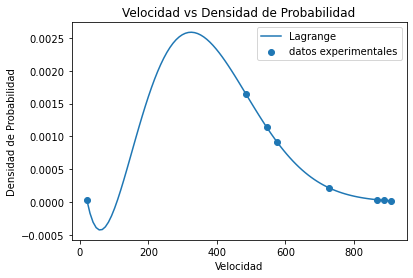

In [78]:
yr=np.linspace(V2[0], V2[-1],100)
plt.plot(yr, inter_lagrange(yr,V2,P2), label="Lagrange")
plt.scatter(V2,P2, label="datos experimentales")
plt.title("Velocidad vs Densidad de Probabilidad")
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Velocidad")
plt.legend()
plt.show()

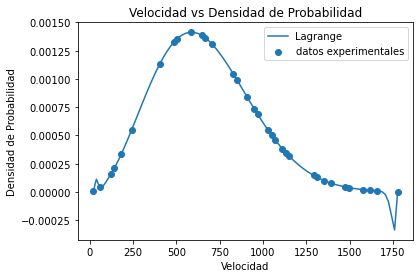

In [79]:
zr=np.linspace(V3[0], V3[-1],100)
plt.plot(zr, inter_lagrange(zr,V3,P3), label="Lagrange")
plt.scatter(V3,P3, label="datos experimentales")
plt.title("Velocidad vs Densidad de Probabilidad")
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Velocidad")
plt.legend()
plt.show()

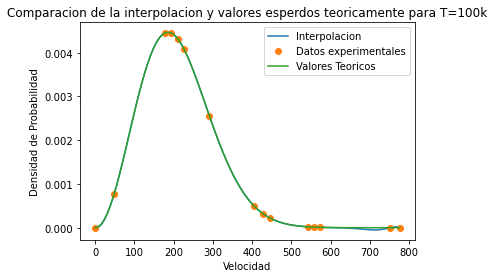

In [80]:
#b)
def Probabilidad(v):
    return(m/(2*pi*k*T))**(3/2) *4*pi*v**2*np.exp(-m*v**2/(2*k*T))

m=80e-27
k=1.38e-23
T=100

datosx= np.linspace(V1[0], V1[-1], 100)
plt.plot(xr,inter_lagrange(xr,V1,P1), label="Interpolacion")
plt.plot(V1,P1,"o", label="Datos experimentales")
plt.plot(datosx, Probabilidad(datosx), label="Valores Teoricos")
plt.title("Comparacion de la interpolacion y valores esperdos teoricamente para T=100k")
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Velocidad")
plt.legend()
plt.show()

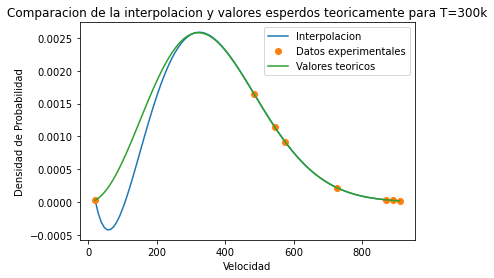

In [81]:
T=300
datosy= np.linspace(V2[0], V2[-1], 100)
plt.plot(yr,inter_lagrange(yr,V2,P2), label="Interpolacion")
plt.plot(V2,P2,"o", label="Datos experimentales")
plt.plot(datosy, Probabilidad(datosy), label="Valores teoricos")
plt.title("Comparacion de la interpolacion y valores esperdos teoricamente para T=300k")
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Velocidad")
plt.legend()
plt.show()

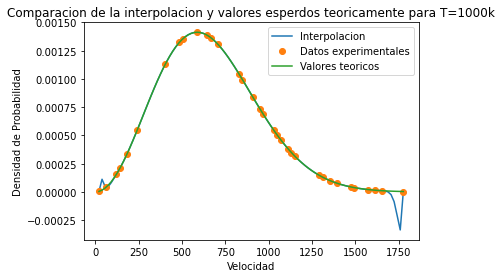

In [82]:
T=1000
datosz= np.linspace(V3[0], V3[-1], 100)
plt.plot(zr,inter_lagrange(zr,V3,P3), label="Interpolacion")
plt.plot(V3,P3,"o", label="Datos experimentales")
plt.plot(datosz, Probabilidad(datosz), label="Valores teoricos")
plt.title("Comparacion de la interpolacion y valores esperdos teoricamente para T=1000k")
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Velocidad")
plt.legend()
plt.show()

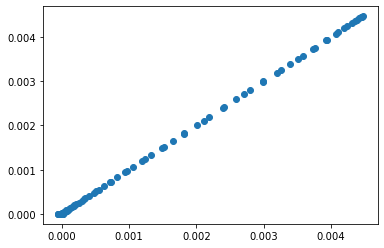

In [83]:
T=100
plt.plot(inter_lagrange(xr,V1,P1), Probabilidad(datosx), "o")

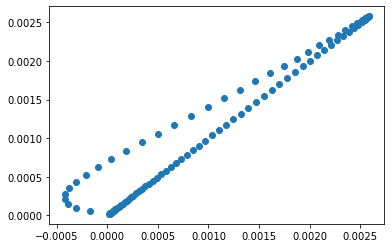

In [84]:
T=300
plt.plot(inter_lagrange(yr,V2,P2), Probabilidad(datosy), "o")

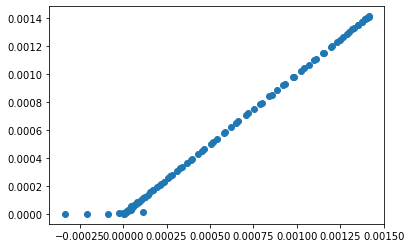

In [85]:
T=1000
plt.plot(inter_lagrange(zr,V3,P3), Probabilidad(datosz), "o")

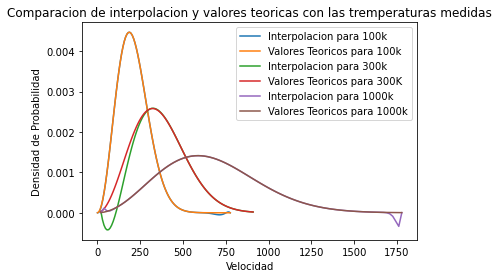

In [86]:
#c)
T=100
datosx= np.linspace(V1[0], V1[-1], 100)
plt.plot(xr,inter_lagrange(xr,V1,P1), label="Interpolacion para 100k")
# plt.plot(V1,P1,"o")
plt.plot(datosx, Probabilidad(datosx), label="Valores Teoricos para 100k")
T=300
datosy= np.linspace(V2[0], V2[-1], 100)
plt.plot(yr,inter_lagrange(yr,V2,P2), label="Interpolacion para 300k")
# plt.plot(V2,P2,"o")
plt.plot(datosy, Probabilidad(datosy), label="Valores Teoricos para 300K")
T=1000
datosz= np.linspace(V3[0], V3[-1], 100)
plt.plot(zr,inter_lagrange(zr,V3,P3), label="Interpolacion para 1000k")
# plt.plot(V3,P3,"o")
plt.plot(datosz, Probabilidad(datosz), label="Valores Teoricos para 1000k")
plt.title("Comparacion de interpolacion y valores teoricas con las tremperaturas medidas")
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Velocidad")
plt.legend()

###### R=
Podemos notar que la interpolcion para $T=100k$ encontro valores muy cercanos a los que nos da la teoria, mientras que la intepolacion de $T=300k$ no cuadro al inicio con los valores encontrados en la teoria y en la interpolacion de $T=1000K$ encontro valores cercanos a la teoria excepto por dos picos uno al inicio y el otro al final.

Ahora tambien podemos ver que mientras menor sea la temperatura $T$ mayor densidad de probabilidad habra y menor seran las velocidades de las particulas, al ir aumentando la temperatura, la densidad de probabilidad bajara y las velocidades de las particulas aumentara.

## 2.-

En un laboratorio se ha medido la magnetizacion de un material en dos etapas distintas.

La primera consistio en obtener los valores de magnetizacion $M$ al aumentar gradualmente la intensidad del campo magnetico $H$. 

En la segunda etapa, la magnetizacion se midio al ir disminuyendo la intensidad del campo magnetico,  desde el valor mas grande hasta el valor mas pequeno de la primera etapa.

#### a) 
Grafica los puntos obtenidos en cada etapa, usa solo una imagen para ello.  

#### b) 
Interpola con Lagrange cada una de las etapas. Grafica las interpolaciones sobre los puntos medidos. A que cres que se deba la forma de la grafica?

#### c)
Interpola con splines. Grafica las interpolaciones sobre los puntos medidos.


#### d)
Con tus propias palabras da una conclusion sobre el fenomeno medido. Trata de responder las siguientes preguntas:
Como se veria la curva para un nuevo material?, Que cres que suceda si aumenta o disminuye la temperatura del material?

Apoyate de la teoria que conozcas y de la grafica con la mejor interpolacion.






In [87]:
#primera etapa
H1 = [-193, -80, 18, 40, 48, 85, 193]
M1 = [-1.0, -0.95, -0.7, -0.4, 0.0, 0.7, 1.0]

#segunda etapa
H2 = [-193, -103, -73, -45, -40, 2, 80, 193]
M2 = [-1.0, -0.8, -0.6, 0.2, 0.4, 0.8, 0.95, 1.0]



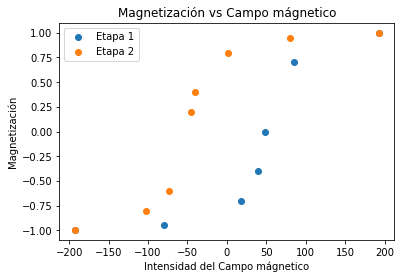

In [88]:
#a)
plt.scatter(H1,M1, label="Etapa 1")
plt.scatter(H2,M2, label= "Etapa 2")
plt.title("Magnetización vs Campo mágnetico")
plt.ylabel("Magnetización")
plt.xlabel("Intensidad del Campo mágnetico")
plt.legend()
plt.show()

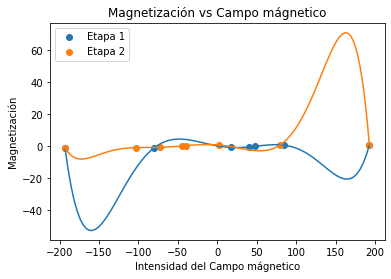

In [89]:
#b)
xr1=np.linspace(H1[0],H1[-1],100)
xr2=np.linspace(H2[0],H2[-1],100)
plt.plot(xr1, inter_lagrange(xr1,H1,M1))
plt.plot(xr2, inter_lagrange(xr2,H2,M2))
plt.scatter(H1,M1, label="Etapa 1")
plt.scatter(H2,M2, label="Etapa 2")
plt.title("Magnetización vs Campo mágnetico")
plt.ylabel("Magnetización")
plt.xlabel("Intensidad del Campo mágnetico")
plt.legend()
plt.show()
#La graficá queda asi debido a que este no es el metodo mas adecuado debido a que los puntos con los que trabaja la interpolacion esta muy separados entre si

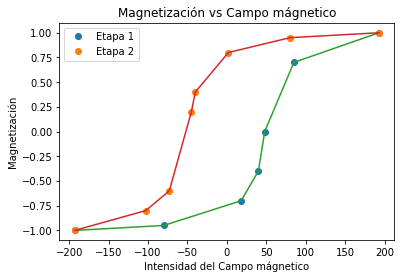

In [90]:
#C)
y=CubicSpline(H1,M1,bc_type="natural")
z=CubicSpline(H2,M2,bc_type="natural")
plt.plot(H1,M1,"o", label="Etapa 1")
plt.plot(H2,M2,"o", label="Etapa 2")
plt.plot(H1,y(H1))
plt.plot(H2,z(H2))
plt.title("Magnetización vs Campo mágnetico")
plt.ylabel("Magnetización")
plt.xlabel("Intensidad del Campo mágnetico")
plt.legend()
plt.show()

### d)
###### R= 
Al cambiar el material y medir la magnetización con los mismos valores de la intensidad del campo magnetico la grafica cambiaria segun los resultados del eje y (magnetizacion), esto variaria dependiendo si se trata de un material ferromagnetico,paramagnético o diamagnético
Si se aumenta o disminuye la temperatura la magnetización podria cambiar, al aumentar la temperatura disminuria la magnetización, debido a que el calor desalinea los dominios magneticos, mientras que al disminuir la temperatura la magnetización seria mayor

## 3.-

En una constructora se obtuvieron las siguientes mediciones al probar el funcionamiento de un material.

La lista M3 contiene las mediciones hechas para el material,  mientas que la lista T3 corresponde a los tiempos de cada medicion.

#### a) 
Haz una grafica de las mediciones del material, usa puntos para ello. Si puedes da una hipotesis del comportamiento del material.

#### b)
Une los puntos con una linea continua e interpolalos con la tecnica que prefieras. Indica las diferencias entre ellos.

#### c) 
Con la Interpolacion, da una interpretacion del material.  Si puedes trata de aproximar de forma analitica o por interpolacion los maximos y minimos de la grafica. 


In [91]:
T3 = [ 0.024, 0.084, 0.138, 0.15 , 0.252, 0.378, 0.39 , 0.529, 0.559,
       0.661, 0.679, 0.769, 1.165, 1.279, 1.435, 1.453, 1.592, 1.616,
       1.622, 1.76 , 1.778, 1.838, 1.904, 1.922, 1.982, 2.228, 2.264,
       2.318, 2.871, 3.099, 3.171, 3.231, 3.441, 3.459, 3.532, 3.592,
       3.64 , 3.82 , 3.844, 3.958, 3.976, 4.09 , 4.18 , 4.24 , 4.336,
       4.456, 4.529, 4.739, 4.781, 4.913, 5.099, 5.111, 5.129, 5.195,
       5.237, 5.405, 5.532, 5.538, 5.556, 5.892]

M3 = [  0.915,  0.946,  0.693,  0.608, -0.282, -0.86 , -0.849, -0.051,
        0.188,  0.73 ,  0.755,  0.53 ,  0.009,  0.548,  0.233,  0.136,
       -0.479, -0.514, -0.518, -0.159, -0.072,  0.21 ,  0.419,  0.446,
        0.429, -0.384, -0.404, -0.339, -0.309,  0.136,  0.263,  0.267,
       -0.175, -0.204, -0.242, -0.182, -0.089,  0.214,  0.214,  0.071,
        0.035, -0.16 , -0.18 , -0.115,  0.05 ,  0.168,  0.132, -0.138,
       -0.148, -0.033,  0.13 ,  0.128,  0.121,  0.066,  0.017, -0.115,
       -0.036, -0.03 , -0.011, -0.011]

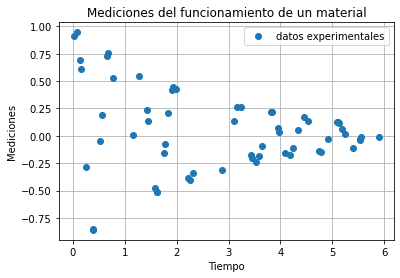

In [92]:
#a)
plt.plot(T3,M3,"o", label="datos experimentales")
plt.title("Mediciones del funcionamiento de un material")
plt.xlabel("Tiempo")
plt.ylabel("Mediciones")
plt.legend()
grid()

(-1.0, 1.0)

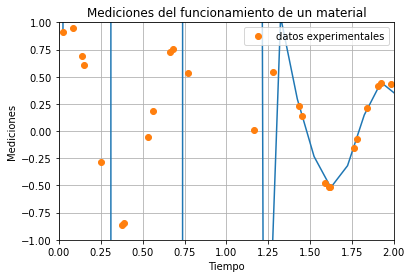

In [93]:
#b)
y=arange(T3[0], T3[-1], 0.1)
plt.plot(y,inter_lagrange(y,T3,M3))
plt.plot(T3,M3,"o", label="datos experimentales") 
plt.title("Mediciones del funcionamiento de un material")
plt.xlabel("Tiempo")
plt.ylabel("Mediciones")
plt.legend()
grid()
plt.xlim(0,2)
plt.ylim(-1,1)
# Langrage no es el metodo mas adecuado debido a que los puntos con los que trabaja la interpolacion esta muy separados entre si

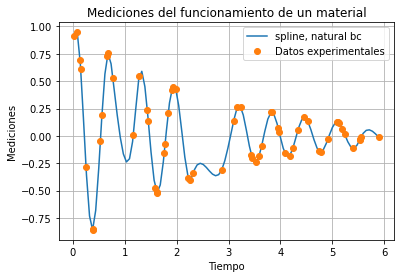

In [94]:
#b)
xr = np.linspace(T3[0], T3[-1], 100)
y = CubicSpline(T3, M3, bc_type="natural")
plt.plot(xr, y(xr), label="spline, natural bc")
plt.plot(T3,M3,"o", label= "Datos experimentales") 
plt.title("Mediciones del funcionamiento de un material")
plt.xlabel("Tiempo")
plt.ylabel("Mediciones")
plt.legend()
grid()

## C)
###### R=
Podemos ver que se trata de un movimiento amortiguado, por lo que puede ser un resorte que tiene en uno de sus lados un objeto con  masa m 